In [1]:
import requests
import urllib3
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)
from datetime import date, timedelta

# Download data

In [2]:
auth_url = "https://www.strava.com/oauth/token"
activites_url = "https://www.strava.com/api/v3/athlete/activities"

In [3]:
payload = {
    'client_id': "104136",
    'client_secret': 'd84d42afe9b3f6922d70c659faac1d96875d6dad',
    'refresh_token': '36a5d7075252c21122db9c00e1ef9c032411a549',
    'grant_type': "refresh_token",
    'f': 'json'
}

In [4]:
print("Requesting Token...\n")
res = requests.post(auth_url, data=payload, verify=False)
access_token = res.json()['access_token']
print("Access Token = {}\n".format(access_token))

Requesting Token...

Access Token = ff4c9f2bd4af79fcb326def8b0e4539971c89308



In [5]:
header = {'Authorization': 'Bearer ' + access_token}
my_dataset = []

page = 1
param = {'per_page': 200, 'page': page}
data_page = requests.get(activites_url, headers=header, params=param).json()
while len(data_page)>0:
    print(page)
    param = {'per_page': 200, 'page': page}
    data_page = requests.get(activites_url, headers=header, params=param).json()
    my_dataset += data_page
    page += 1


1
2
3
4


In [6]:
len(my_dataset)

430

In [7]:
print(my_dataset[0]["name"])
print(my_dataset[0]["map"]["summary_polyline"])
print(len(my_dataset))

Zurich Marató Barcelona
u|o{FkybLs@~BcB`DYrB@zHOrAJpAOjBZvF]jGLxBK~PWrEPhMm@xWLpHQlMW|CNhBMh@@fJOjAVrHSn@eA`@yFPkBb@gMcSeGkLqQuZ_A}B{E_HaEuJyK_TaDoHkCuE_Ak@Mq@fAcOYcDN{Cv@mCA{CZiBTcAp@QhCrDxA|CpCvCRtAfCbBlA`D|Av@rApCtAdAtA~CvD|D|@`B|@xEz@CpDcGtEiFlIgOdDcEfBgDzHyJTw@Sg@oGqJBk@nBkDDcA}EiG{FgKqEqGgBcBkK{Nw@gBmJmN_DgDwGoL{JaMu@WeJlMeBfDf@zApEzDtA|DhDdDhDxEbAbCAr@}BjE}BbD}@PyBeAw@cA_AA_AuBg@Yy@{AO_A}BcCuBgEsB{Cu@c@gCoDyBeDaFgIcCuBK}@_CoCmBmDsAmAqD{F[cA_C{ByFqKyIaLgCsEuD{EsAqBmAcCuAwAc@aBkAqBk@W_@}AiCyBoEaIuAqAeCyE_CmC{BwEyCwCuSEcDe@yN^oC[_KVmD[sI`@sFnBqZ|PkE`DyANyBSus@cQuL_BoCqAn@c@tAExB^fI`BxFtBzZ`GlFlBtLfB~AUdQkLbFyBvFuDvG{ApFD|HOlA\fQi@xBb@vT?bI[jGVmE_FuAmDkFgGqAuCoIkLRsAzDuHrBaCzDaHrCmCL}@kEiHue@qr@ZyArB}DnJoNzBmEnCoDh@sAdEwEdA_C~AcBLk@jHyKbAdDpBhD~AvFp@|HAvAX`CtAnFz@pGGz@t@xBt@zEh@pAfCdMOpChB~F|@|ECp@x@hEQd@p@zDFbB~@tCd@`FhAbDVnF`AtGrAbDlBzHbAbJc@oA}@aB_BuHcBsJ{AmLeBeI[gEk@sBmByN{AgFEiB}@_Ec@iFmCmMqB}QeEmUkAsJwAyF@s@`@SfB\zEpEtFrDZ?dCqCfAe@p@_BlAdAjOhTxU`^nDtDh@@fBgCZAzCdBnEzA~AtA`IlKr

# Convert to pandas and save in csv

In [8]:
import pandas as pd
from pandas.io.json import json_normalize
activities = json_normalize(my_dataset)

C:\Users\gritti\AppData\Local\Temp\ipykernel_14188\2102315307.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  activities = json_normalize(my_dataset)


In [9]:
activities.to_csv('my_dataset.csv', index=False)

In [10]:
activities.keys()

Index(['resource_state', 'name', 'distance', 'moving_time', 'elapsed_time',
       'total_elevation_gain', 'type', 'sport_type', 'workout_type', 'id',
       'start_date', 'start_date_local', 'timezone', 'utc_offset',
       'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'trainer', 'commute', 'manual', 'private', 'visibility',
       'flagged', 'gear_id', 'start_latlng', 'end_latlng', 'average_speed',
       'max_speed', 'average_cadence', 'average_temp', 'has_heartrate',
       'average_heartrate', 'max_heartrate', 'heartrate_opt_out',
       'display_hide_heartrate_option', 'elev_high', 'elev_low', 'upload_id',
       'upload_id_str', 'external_id', 'from_accepted_tag', 'pr_count',
       'total_photo_count', 'has_kudoed', 'suffer_score', 'athlete.id',
       'athlete.resource_state', 'map.id', 'map.summary_polyline',
       'map.resource_state', 'average_watts', 'kilojoules', '

In [11]:
activities.start_date[0]

'2023-03-19T07:31:17Z'

# Extract data for marathons

In [44]:
marathon_2022_date = date(2022, 5, 8)
print(marathon_2022_date)
marathon2022 = activities[
    (activities.start_date > str(marathon_2022_date - timedelta(3*30)))&
    (activities.start_date < str(marathon_2022_date + timedelta(1)))&
    (activities.type=='Run')
]
marathon2022 = marathon2022.reset_index()
marathon2022['date'] = [date(*[int(d) for d in day[:10].split('-')]) for day in marathon2022.start_date]
marathon2022['days2race'] = marathon2022.date-marathon2022.date.max()

2022-05-08


In [45]:
marathon2022

,index,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,date,days2race
0,142,2,Zurich Marató Barcelona,42551.8,11210,11210,145.0,Run,Run,1.0,...,21521933,1,a7106563343,uro{Fe`cLgI~EoCbHAhENhAW`FEbGLlF]|KSfJRnCSnDVh...,2,NaN,NaN,NaN,2022-05-08,0 days
1,143,2,Evening Run,6062.0,1646,1646,53.0,Run,Run,NaN,...,21521933,1,a7103853773,yah|FokaLE_@M[UWSe@Be@HQLGb@G^Uh@MRYNIDG?OAEWc...,2,NaN,NaN,NaN,2022-05-07,-1 days
2,144,2,Evening Run,10050.5,2841,2847,70.0,Run,Run,NaN,...,21521933,1,a7093287194,qah|FkjaLE[OYAQK[C]Bk@DONORGl@YLKVYLQ@IGa@e@eA...,2,NaN,NaN,NaN,2022-05-05,-3 days
3,145,2,Evening Run,16143.5,4526,4526,110.0,Run,Run,NaN,...,21521933,1,a7077316738,wah|F_laL?Og@aB@QJq@@E\If@[f@QV]?]Om@{@_BGi@Ty...,2,NaN,NaN,NaN,2022-05-02,-6 days
4,148,2,Evening Run,11208.1,3114,3120,52.0,Run,Run,NaN,...,21521933,1,a7056062859,uah|F_kaLEo@k@gACM?OPa@RQfAg@h@_@@GAm@Ug@eAwBL...,2,NaN,NaN,NaN,2022-04-28,-10 days
5,149,2,Afternoon Run,18621.2,5203,5214,93.0,Run,Run,NaN,...,21521933,1,a7044843144,}}q{Fs{kL@_@GM{@aAc@{@y@iAg@gAu@_A_@w@][QGODa@...,2,NaN,NaN,NaN,2022-04-26,-12 days
6,150,2,Morning Run,23031.9,6204,6204,132.0,Run,Run,0.0,...,21521933,1,a7031844455,ybh|FikaLJWi@gB?c@~CaBFWU_AaAsASg@@}@dBaAFOCQc...,2,NaN,NaN,NaN,2022-04-24,-14 days
7,152,2,Afternoon Run,18609.0,5150,5150,127.0,Run,Run,NaN,...,21521933,1,a7013247075,y}q{Fq{kLIU_AwAQ]u@aAw@{Aw@cA]q@[YKGO?{AxB[RQG...,2,NaN,NaN,NaN,2022-04-20,-18 days
8,154,2,Morning Run 🥵,31736.1,9184,9578,506.0,Run,Run,0.0,...,21521933,1,a6995139652,wm_|FnceLjA|A@z@xAnEnDbEZ~Ap@jH~B|JpAnNdBnNjAd...,2,NaN,NaN,NaN,2022-04-17,-21 days
9,155,2,Morning Run 🤞🏻🤞🏻🤞🏻,8750.1,2494,2494,89.0,Run,Run,0.0,...,21521933,1,a6989110288,}m_|F~beLh@r@b@XFH@L?f@Fh@ZdAz@hC?LGHQ@{@K}A]o...,2,NaN,NaN,NaN,2022-04-16,-22 days


In [46]:
marathon_2023_date = date(2023, 3, 19)
print(marathon_2023_date)
marathon2023 = activities[
    (activities.start_date > str(marathon_2023_date - timedelta(3*30)))&
    (activities.start_date < str(marathon_2023_date + timedelta(1)))&
    (activities.type=='Run')
]
marathon2023 = marathon2023.reset_index()
marathon2023['date'] = [date(*[int(d) for d in day[:10].split('-')]) for day in marathon2023.start_date]
marathon2023['days2race'] = marathon2023.date-marathon2023.date.max()

2023-03-19


In [47]:
marathon2023

,index,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,date,days2race
0,0,2,Zurich Marató Barcelona,42626.9,10658,10663,147.0,Run,Run,1.0,...,21521933,1,a8739724557,u|o{FkybLs@~BcB`DYrB@zHOrAJpAOjBZvF]jGLxBK~PWr...,2,NaN,NaN,NaN,2023-03-19,0 days
1,1,2,Lunch Run,1079.4,311,311,34.0,Run,Run,0.0,...,21521933,1,a8733560415,_lg|F}~bLVh@DTQNs@hAYf@kA`BMZGJKH]v@g@l@Qb@KLW...,2,NaN,NaN,NaN,2023-03-18,-1 days
2,2,2,Morning Run,5838.6,1508,1514,27.0,Run,Run,0.0,...,21521933,1,a8733560200,o`h|Fe}aLJIn@Un@{@jAqA^s@LOBMTg@COc@i@KUNc@Zg@...,2,NaN,NaN,NaN,2023-03-18,-1 days
3,3,2,Morning Run,6639.4,1826,1861,54.0,Run,Run,0.0,...,21521933,1,a8727788722,umh|Fox`LLh@Bh@Kp@Af@Gf@Q`@SXQNg@\m@Z}ArAKPENA...,2,NaN,NaN,NaN,2023-03-17,-2 days
4,4,2,Evening Run,8258.3,2101,2146,64.0,Run,Run,NaN,...,21521933,1,a8719918522,y_h|Fy|aL\ULM\g@`A}@v@{AZYFMZ]Gc@c@e@CQBS|@sA\...,2,NaN,NaN,NaN,2023-03-15,-4 days
5,5,2,Morning Run,10501.4,2700,2701,78.0,Run,Run,NaN,...,21521933,1,a8705959221,u~g|Fs}aLLGb@y@BKNWf@s@Tc@TMLCb@a@FM?YQOEM?KDQ...,2,NaN,NaN,NaN,2023-03-13,-6 days
6,7,2,Lunch Trail Run,12957.8,4471,4582,523.0,Run,TrailRun,0.0,...,21521933,1,a8690530910,}yt{Fwl{KXz@l@`A`@rAYD_BaAS@[nA?Td@dD^p@CXUp@U...,2,NaN,NaN,NaN,2023-03-10,-9 days
7,8,2,Morning Run,9356.5,2520,2561,72.0,Run,Run,0.0,...,21521933,1,a8673420884,e_h|Fe}aL\UZc@FMX[ZSNOn@qAHSj@u@CUUWEY?_@Vi@Xa...,2,NaN,NaN,NaN,2023-03-07,-12 days
8,9,2,Afternoon Run,32008.7,8689,8719,196.0,Run,Run,NaN,...,21521933,1,a8665887817,__h|Fw}aLxAuAtAwBh@g@Pa@?YQGEWhBiFdCgEnDcF}DkI...,2,NaN,NaN,NaN,2023-03-05,-14 days
9,10,2,Morning Run,19506.4,5173,5188,43.0,Run,Run,0.0,...,21521933,1,a8651362692,o_h|F_}aLr@c@@WGINHf@g@Ze@`@_AbAsABSAKSMSq@@G`...,2,NaN,NaN,NaN,2023-03-03,-16 days


In [48]:
marathon2022['year'] = '2022'
marathon2023['year'] = '2023'
marathons = pd.concat([marathon2022, marathon2023], ignore_index=True)

In [49]:
marathons

,index,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,average_watts,kilojoules,device_watts,date,days2race,year
0,142,2,Zurich Marató Barcelona,42551.8,11210,11210,145.0,Run,Run,1.0,...,1,a7106563343,uro{Fe`cLgI~EoCbHAhENhAW`FEbGLlF]|KSfJRnCSnDVh...,2,NaN,NaN,NaN,2022-05-08,0 days,2022
1,143,2,Evening Run,6062.0,1646,1646,53.0,Run,Run,NaN,...,1,a7103853773,yah|FokaLE_@M[UWSe@Be@HQLGb@G^Uh@MRYNIDG?OAEWc...,2,NaN,NaN,NaN,2022-05-07,-1 days,2022
2,144,2,Evening Run,10050.5,2841,2847,70.0,Run,Run,NaN,...,1,a7093287194,qah|FkjaLE[OYAQK[C]Bk@DONORGl@YLKVYLQ@IGa@e@eA...,2,NaN,NaN,NaN,2022-05-05,-3 days,2022
3,145,2,Evening Run,16143.5,4526,4526,110.0,Run,Run,NaN,...,1,a7077316738,wah|F_laL?Og@aB@QJq@@E\If@[f@QV]?]Om@{@_BGi@Ty...,2,NaN,NaN,NaN,2022-05-02,-6 days,2022
4,148,2,Evening Run,11208.1,3114,3120,52.0,Run,Run,NaN,...,1,a7056062859,uah|F_kaLEo@k@gACM?OPa@RQfAg@h@_@@GAm@Ug@eAwBL...,2,NaN,NaN,NaN,2022-04-28,-10 days,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,40,2,Morning Run,13889.4,4813,4887,500.0,Run,Run,0.0,...,1,a8296482698,}xg|FosaLhAyBTO|@yAbAmAzGeLdJgNRFv@jAXDr@qA|Ae...,2,NaN,NaN,NaN,2022-12-27,-82 days,2023
74,41,2,Morning Run,8697.2,2640,2648,58.0,Run,Run,0.0,...,1,a8291774764,k`h|Fg|aL`@_@T_@Fc@k@aA@MfAeB\a@Ve@\c@rA{Br@_A...,2,NaN,NaN,NaN,2022-12-26,-83 days,2023
75,42,2,Morning Run,22617.3,6199,6226,152.0,Run,Run,NaN,...,1,a8284836819,c~g|F}~aLAOi@_AVw@hCmEvFsIpA{ApBaDb@c@qDuHOIBI...,2,NaN,NaN,NaN,2022-12-24,-85 days,2023
76,44,2,Morning Run,19608.4,5303,5308,126.0,Run,Run,0.0,...,1,a8277511691,u_h|Fo|aL\a@Zm@GQi@q@?SbCiD|AoCxBgDp@}@d@cA|@m...,2,NaN,NaN,NaN,2022-12-22,-87 days,2023


# Plotting

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'Total time (hours)')

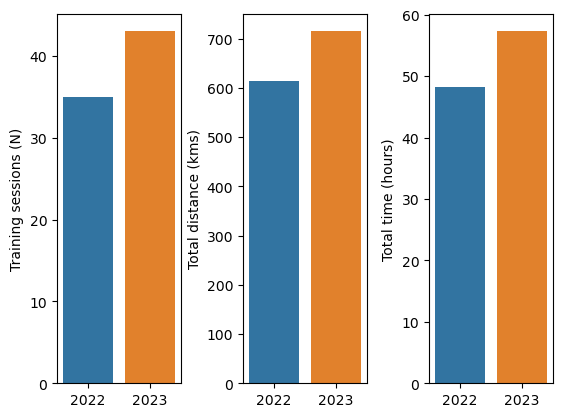

In [68]:
fig, ax = plt.subplots(1,3)
fig.subplots_adjust(wspace=0.5)
sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['distance'].count(),
    ax = ax[0]
)
ax[0].set_ylabel('Training sessions (N)')
sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['distance'].sum()/1000,
    ax = ax[1]
)
ax[1].set_ylabel('Total distance (kms)')
sns.barplot(
    data = marathons,
    x = marathons.year.unique(), 
    y = marathons.groupby(['year'])['elapsed_time'].sum()/60/60,
    ax = ax[2]
)
ax[2].set_ylabel('Total time (hours)')

In [28]:
print(len(marathon2022_training),len(marathon2023_training))
print(marathon2022_training.distance.sum()/1000,marathon2023_training.distance.sum()/1000)
print(marathon2022_training.elapsed_time.sum()/60/60,marathon2023_training.elapsed_time.sum()/60/60)
print(marathon2022_training.total_elevation_gain.sum(),marathon2023_training.total_elevation_gain.sum())


35 43
613.754 715.0845000000002
48.2125 57.29694444444444
4780.0 7846.0


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.average_speed)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.average_speed)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Average Speed over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.distance/1000)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.distance/1000)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Distance over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure() #create overall container

ax1 = fig.add_subplot(111) #add a 1 by 1 plot to the figure

dday = date(*[int(d) for d in marathon2022_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2022_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2022_training.elapsed_time/60/60)
ax1.plot(x[::-1], y[::-1], '-o') #plot data points in scatter plot on ax1

dday = date(*[int(d) for d in marathon2023_training.start_date.max()[:10].split('-')])
ds = [ date(*[int(ymd) for ymd in date_str[:10].split('-')]) for date_str in marathon2023_training.start_date ]
x = np.asarray([ str(d-dday).split(',')[0] for d in ds ] )  #convert data to numpy array
for i in range(len(x)):
    if ':' in x[i]:
        x[i] = 0
    else:
        x[i] = int(x[i][:3])
x = x.astype(int)
y = np.asarray(marathon2023_training.elapsed_time/60/60)
ax1.plot(x[::-1], y[::-1],'-o') #plot data points in scatter plot on ax1

ax1.set_title('Elapsed time over Time')
fig.autofmt_xdate(rotation=45)
#ax1.set_ylim([0,5])